<a href="https://colab.research.google.com/github/ramanath-naik/machine_learning/blob/main/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
print(X)

[[1.31708782]
 [1.76038837]
 [0.32075558]
 [1.98591745]
 [0.06875877]
 [0.51402832]
 [1.22452449]
 [1.39123388]
 [1.56354645]
 [1.6576259 ]
 [0.16459506]
 [0.03732169]
 [1.8588425 ]
 [0.6034559 ]
 [0.56144214]
 [0.47395668]
 [0.14073951]
 [0.32046806]
 [1.35991792]
 [0.83868642]
 [0.06205851]
 [0.70655167]
 [1.65100316]
 [0.6592393 ]
 [1.49737548]
 [0.65608681]
 [1.47663811]
 [0.56866389]
 [0.75253768]
 [1.53849107]
 [1.34872653]
 [1.55632968]
 [1.74141541]
 [1.37076421]
 [1.03750492]
 [0.25511403]
 [0.21217868]
 [1.72952424]
 [0.06524655]
 [1.70379673]
 [0.52599873]
 [1.34832233]
 [0.93053543]
 [0.07634832]
 [1.98103232]
 [1.88553882]
 [0.03983093]
 [0.59730105]
 [1.93226761]
 [0.3538347 ]
 [1.40358179]
 [1.86610056]
 [1.64113023]
 [1.43890421]
 [1.95622599]
 [1.33547938]
 [1.74629783]
 [0.17359441]
 [0.22336554]
 [0.67694423]
 [0.31570459]
 [1.63628519]
 [1.91704256]
 [0.68887129]
 [1.10167194]
 [1.73040576]
 [0.81637838]
 [1.38415654]
 [1.19688487]
 [0.23354653]
 [0.26436995]
 [0.57

In [3]:
print(y)

[[ 6.77898725]
 [ 9.72701461]
 [ 3.92631128]
 [11.87700224]
 [ 2.24661741]
 [ 6.08088575]
 [ 7.86443994]
 [ 8.29684933]
 [ 8.49016568]
 [ 7.99447029]
 [ 2.17470781]
 [ 3.22369788]
 [ 8.09596849]
 [ 6.43370653]
 [ 6.82681835]
 [ 7.1085827 ]
 [ 2.5834488 ]
 [ 4.6527543 ]
 [ 7.11269477]
 [ 6.41846313]
 [ 4.13877124]
 [ 6.9802865 ]
 [ 8.1433346 ]
 [ 5.7400089 ]
 [ 6.4049346 ]
 [ 5.2808146 ]
 [ 7.28631171]
 [ 4.77581424]
 [ 6.06385246]
 [ 7.6159472 ]
 [ 6.7388826 ]
 [ 7.15102277]
 [ 7.66837027]
 [ 7.75593861]
 [ 5.93996876]
 [ 3.70657   ]
 [ 4.85415571]
 [ 9.80884839]
 [ 3.84753361]
 [ 8.51552838]
 [ 3.25367298]
 [ 8.64730935]
 [ 7.67436796]
 [ 5.6624292 ]
 [ 9.09573642]
 [12.82681106]
 [ 4.62637276]
 [ 6.42892794]
 [ 9.8295362 ]
 [ 2.82096269]
 [ 9.40038321]
 [ 9.69870002]
 [ 8.86742702]
 [ 7.78511071]
 [11.03244681]
 [ 8.44238032]
 [ 9.17342384]
 [ 4.23146962]
 [ 4.31924916]
 [ 6.7092334 ]
 [ 5.47003307]
 [ 9.63421525]
 [ 9.40292132]
 [ 4.91825495]
 [ 9.07927503]
 [ 9.52890208]
 [ 4.88021

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.67041558],
       [3.14990707]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.67041558],
       [9.97022972]])

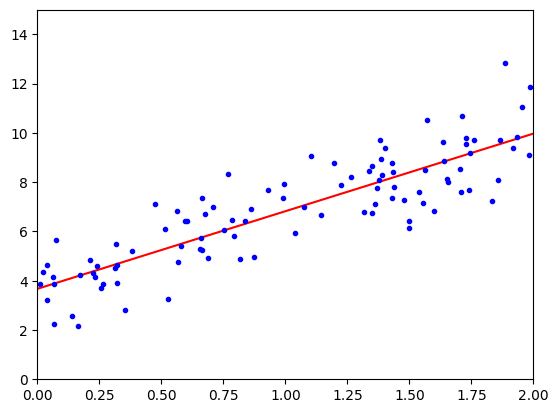

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.67041558]), array([[3.14990707]]))

In [9]:
lin_reg.predict(X_new)

array([[3.67041558],
       [9.97022972]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.67041558],
       [3.14990707]])

In [13]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[3.67041558],
       [3.14990707]])

In [14]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[3.61955169],
       [3.20848719]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.59174228]), array([3.15112674]))